In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_csv('../Visa Datathon/Clean data/Card_data_clean.csv')

In [3]:
df.head()

,ID,date,Type_of_transaction,Merchandise_code,Merchandise_catg,spend
0,202306,2023-06-08,Family,7523,"PARKING LOTS,METERS,GARAGES",6.25
1,202306,2023-06-13,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,1.39
2,202307,2023-07-09,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,1.41
3,202306,2023-06-13,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,1.39
4,202307,2023-07-09,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,1.41


In [4]:
df.nunique()

ID                       3
date                    92
Type_of_transaction      5
Merchandise_code        80
Merchandise_catg        80
spend                  932
dtype: int64

So in this part, we will analyze the card data based on these categories : 
1. Type of transactions (To understand the most important type of consumption for each consumers)
2. Amount of spending(To understand the amount each consumer tend to spend )
3. Merchandise categories( To under on which products is the most spent for each type of transactions)

In [5]:
client1= df[(df.ID==202305)]
client1=client1.reset_index()
client1.drop(columns=['index'])

,ID,date,Type_of_transaction,Merchandise_code,Merchandise_catg,spend
0,202305,2023-05-17,Urban Spenders,7922,THEATRICAL PRODUCERS,268.15
1,202305,2023-05-05,Frugal Family,5411,GROCERY STORES/SUPERMARKETS,43.68
2,202305,2023-05-14,Frugal Family,5411,GROCERY STORES/SUPERMARKETS,51.78
3,202305,2023-05-21,Frugal Family,5411,GROCERY STORES/SUPERMARKETS,61.01
4,202305,2023-05-28,Frugal Family,5411,GROCERY STORES/SUPERMARKETS,70.74
...,...,...,...,...,...,...
424,202305,2023-05-22,Family,5813,BARS/TAVERNS/LOUNGES/DISCOS,31.53
425,202305,2023-05-22,Family,5813,BARS/TAVERNS/LOUNGES/DISCOS,31.53
426,202305,2023-05-22,Family,5813,BARS/TAVERNS/LOUNGES/DISCOS,19.35
427,202305,2023-05-02,Urban Spenders,5999,MISC SPECIALTY RETAIL,12.43


In [6]:
client2= df[(df.ID==202306)]
client2=client2.reset_index()
client2.drop(columns=['index'])

,ID,date,Type_of_transaction,Merchandise_code,Merchandise_catg,spend
0,202306,2023-06-08,Family,7523,"PARKING LOTS,METERS,GARAGES",6.25
1,202306,2023-06-13,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,1.39
2,202306,2023-06-13,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,1.39
3,202306,2023-06-25,Frugal Family,9399,GOV'T SERV - DEFAULT,38.27
4,202306,2023-06-08,Affluent Segment,5691,MENS/WOMENS CLOTHING STORES,212.55
...,...,...,...,...,...,...
456,202306,2023-06-01,Urban Spenders,5999,MISC SPECIALTY RETAIL,12.30
457,202306,2023-06-03,Urban Spenders,5999,MISC SPECIALTY RETAIL,60.00
458,202306,2023-06-24,Urban Spenders,5999,MISC SPECIALTY RETAIL,182.95
459,202306,2023-06-30,Urban Spenders,7922,THEATRICAL PRODUCERS,131.19


In [7]:
client3= df[(df.ID==202307)]
client3=client3.reset_index()
client3.drop(columns=['index'])

,ID,date,Type_of_transaction,Merchandise_code,Merchandise_catg,spend
0,202307,2023-07-09,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,1.41
1,202307,2023-07-09,Affluent Segment,5499,MISC FOOD STORES - DEFAULT,1.41
2,202307,2023-07-15,Frugal Family,5311,DEPARTMENT STORES,38.79
3,202307,2023-07-26,Affluent Segment,5641,CHILDREN/INFANTS WEAR STORES,48.66
4,202307,2023-07-26,Affluent Segment,4112,PASSENGER RAILWAYS,12.91
...,...,...,...,...,...,...
483,202307,2023-07-19,Family,5411,GROCERY STORES/SUPERMARKETS,12.08
484,202307,2023-07-25,Urban Spenders,7399,BUSINESS SERVICES - DEFAULT,43.63
485,202307,2023-07-25,Urban Spenders,7399,BUSINESS SERVICES - DEFAULT,43.63
486,202307,2023-07-15,Sensible Spenders,5941,SPORTING GOODS STORES,14.13


I will choose one of these three clients to analyze his/her behavior and testing my model .

#### Client 202305

In [8]:
# amount of spending
sum_client_1= client1.groupby('ID')['spend'].sum()
sum_client_1

ID
202305    12879.01
Name: spend, dtype: float64

In [9]:
client1['date']=pd.to_datetime(client1['date'],format='%Y-%m-%d')
time_period_1= max(client1["date"])-min(client1['date'])
print("Day on survey of client 1 :",time_period_1)

Day on survey of client 1 : 30 days 00:00:00


On 30 days, the spending amount of this client is 12879.01$

In [66]:
# We now use KNN to clasify which products this individual spend the most to determinate the need of him/her 
client1['Type_of_transaction'].value_counts()

Type_of_transaction
Urban Spenders       107
Frugal Family        105
Family               105
Affluent Segment      80
Sensible Spenders     32
Name: count, dtype: int64

In [11]:
client1.dtypes

index                           int64
ID                              int64
date                   datetime64[ns]
Type_of_transaction            object
Merchandise_code                int64
Merchandise_catg               object
spend                         float64
dtype: object

In [12]:
#pd.get_dummies(client1["Type_of_transaction"],dtype=float) #tranform categorical data into numerical(one-hot encoding)

In [13]:
from sklearn.preprocessing import LabelEncoder #label encoding
from sklearn.model_selection import train_test_split

In [14]:
client1_knn= client1.drop(columns=['date','ID','index'])
client1_knn.head()

,Type_of_transaction,Merchandise_code,Merchandise_catg,spend
0,Urban Spenders,7922,THEATRICAL PRODUCERS,268.15
1,Frugal Family,5411,GROCERY STORES/SUPERMARKETS,43.68
2,Frugal Family,5411,GROCERY STORES/SUPERMARKETS,51.78
3,Frugal Family,5411,GROCERY STORES/SUPERMARKETS,61.01
4,Frugal Family,5411,GROCERY STORES/SUPERMARKETS,70.74


In [15]:
for col in client1_knn:
    le=LabelEncoder()
    client1_knn[col]=le.fit_transform(client1_knn[col])

In [16]:
client1_knn.head()

,Type_of_transaction,Merchandise_code,Merchandise_catg,spend
0,4,38,45,317
1,2,10,20,254
2,2,10,20,268
3,2,10,20,274
4,2,10,20,281


In [17]:
# checking null values
null_value= pd.isnull(client1_knn)
null=null_value.sum()
null

Type_of_transaction    0
Merchandise_code       0
Merchandise_catg       0
spend                  0
dtype: int64

In [18]:
# feature scaling
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score

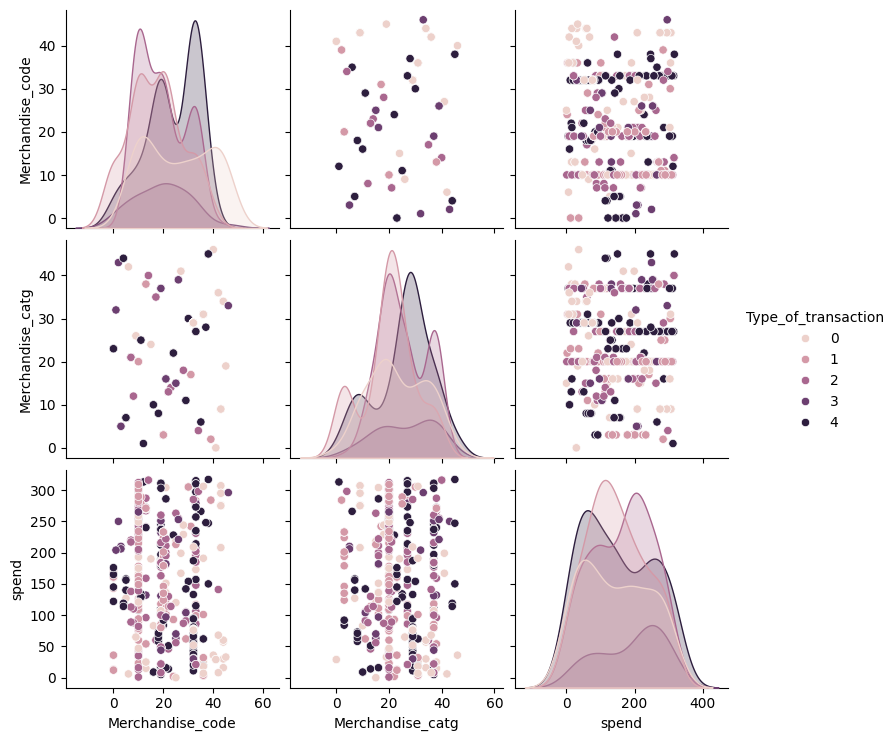

In [19]:
sns.pairplot(client1_knn, hue='Type_of_transaction')

In [20]:
scaler = StandardScaler()
scaler.fit(client1_knn)#.drop('Type_of_transaction',axis=1))
scaled_features = scaler.transform(client1_knn)#.drop('Type_of_transaction',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=client1_knn.columns[:])
df_feat.head()

,Type_of_transaction,Merchandise_code,Merchandise_catg,spend
0,1.423987,1.509358,2.051659,1.750306
1,0.030850,-0.978349,-0.358422,1.071507
2,0.030850,-0.978349,-0.358422,1.222351
3,0.030850,-0.978349,-0.358422,1.286999
4,0.030850,-0.978349,-0.358422,1.362421


In [21]:
# datasplit for training :
#X= client1_knn.iloc[:,0:8]
#y=client1_knn.iloc[:,:8]
#X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0, test_size=0.2)
#sc= StandardScaler()
#X_train= sc.fit_transform(X_train)
#X_test= sc.transform(X_test)

In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(scaled_features,client1_knn['Type_of_transaction'],
               test_size=0.20)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(343, 4)
(86, 4)
(343,)
(86,)


In [24]:
y_test.head

<bound method NDFrame.head of 139    0
157    4
167    4
200    4
35     4
      ..
33     4
15     2
340    0
291    0
292    1
Name: Type_of_transaction, Length: 86, dtype: int32>

In [25]:
# findinf k value 
import math
k= math.sqrt(len(y_test))
k=int(k)
k

9

In [26]:
# so we estimate k is approximmate 9, we now will use the elbow method to find the best k value 

In [27]:
from sklearn.multioutput import MultiOutputClassifier

In [28]:
knn= KNeighborsClassifier(n_neighbors=34)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1 , n_neighbors=1, p=2,weights='uniform')# p=2=euclide ; p=1=manhattan
#classifier = MultiOutputClassifier(knn, n_jobs=-1)
#classifier.fit(X_train,y_train)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
print("y_pred is : ", y_pred)

y_pred is :  [1 4 2 4 4 1 2 2 2 4 2 1 2 4 1 4 0 2 2 1 2 2 2 4 0 1 2 1 2 2 0 4 4 2 2 0 2
 4 1 4 1 2 2 2 2 0 4 1 2 1 4 1 2 4 0 1 2 4 2 1 1 2 0 4 1 2 1 1 2 4 1 2 2 4
 2 4 1 4 2 1 2 4 2 0 0 0]


In [29]:
np.array(y_pred)

array([1, 4, 2, 4, 4, 1, 2, 2, 2, 4, 2, 1, 2, 4, 1, 4, 0, 2, 2, 1, 2, 2,
       2, 4, 0, 1, 2, 1, 2, 2, 0, 4, 4, 2, 2, 0, 2, 4, 1, 4, 1, 2, 2, 2,
       2, 0, 4, 1, 2, 1, 4, 1, 2, 4, 0, 1, 2, 4, 2, 1, 1, 2, 0, 4, 1, 2,
       1, 1, 2, 4, 1, 2, 2, 4, 2, 4, 1, 4, 2, 1, 2, 4, 2, 0, 0, 0])

In [30]:
y_pred.shape

(86,)

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
accuracy= accuracy_score(y_test,y_pred)
print("Accuracy scores :", accuracy)


Accuracy scores : 0.6162790697674418


In [33]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
#classifier.fit(X_train, y_train)

In [34]:
sqrt_k = int(math.sqrt(len(y_test)))
range_k= range (1,sqrt_k*3)
k_scores=[]
for i in range_k: 
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

C:\Users\famcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\famcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\famcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\famcha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\s

[0.7895424836601308, 0.6509803921568628, 0.6738562091503268, 0.6503267973856209, 0.6849673202614379, 0.6856209150326797, 0.7091503267973855, 0.7444444444444445, 0.7209150326797387, 0.6973856209150326, 0.6980392156862745, 0.6869281045751634, 0.6633986928104576, 0.6633986928104576, 0.6156862745098038, 0.6751633986928105, 0.6745098039215687, 0.6745098039215687, 0.6627450980392158, 0.6627450980392158, 0.6745098039215687, 0.6745098039215687, 0.6633986928104576, 0.6751633986928105, 0.6633986928104576, 0.6411764705882353]


[0.9651162790697675, 0.9651162790697675, 0.9534883720930233, 0.9069767441860465, 0.9069767441860465, 0.872093023255814, 0.8604651162790697, 0.8604651162790697, 0.8488372093023255, 0.8488372093023255, 0.813953488372093, 0.8488372093023255, 0.8023255813953488, 0.7674418604651163, 0.6627906976744186, 0.7093023255813954, 0.6744186046511628, 0.6627906976744186, 0.6395348837209303, 0.6511627906976745, 0.6395348837209303, 0.6395348837209303, 0.6395348837209303, 0.6511627906976745, 0.627906976744186, 0.6511627906976745]
Maximum accuracy:- 0.9651162790697675 at K = 0


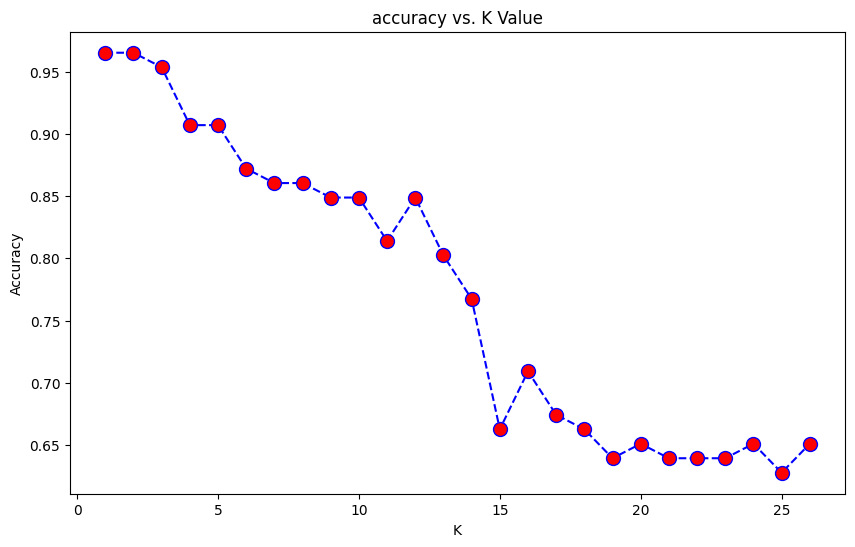

In [35]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,sqrt_k*3):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

print(acc)

plt.figure(figsize=(10,6))
plt.plot(range(1,sqrt_k*3),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))


Minimum error:- 0.03488372093023256 at K = 0


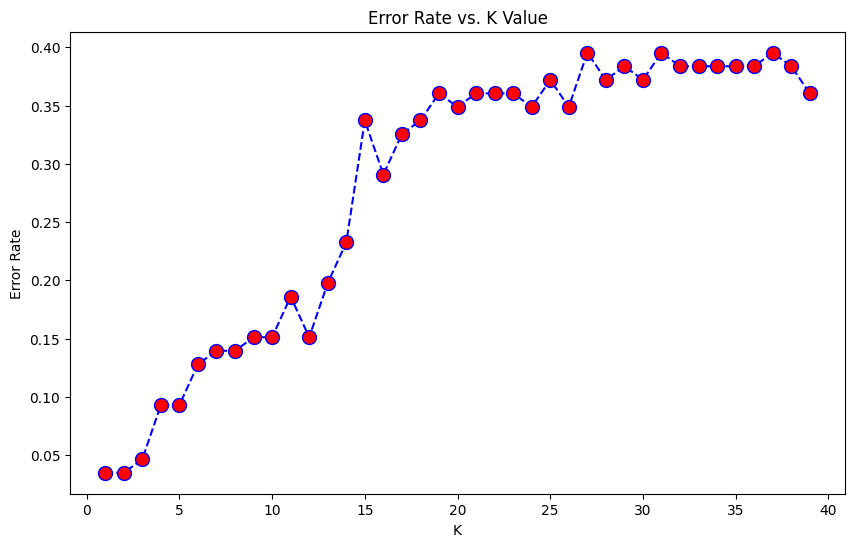

In [36]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [37]:
# final model with k=2:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('WITH K=2')
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

WITH K=2


[[22  1  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  1  2  1]
 [ 0  0  0  0 21]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.93      1.00      0.96        13
           2       0.96      1.00      0.98        25
           3       1.00      0.50      0.67         4
           4       0.95      1.00      0.98        21

    accuracy                           0.97        86
   macro avg       0.97      0.89      0.91        86
weighted avg       0.97      0.97      0.96        86



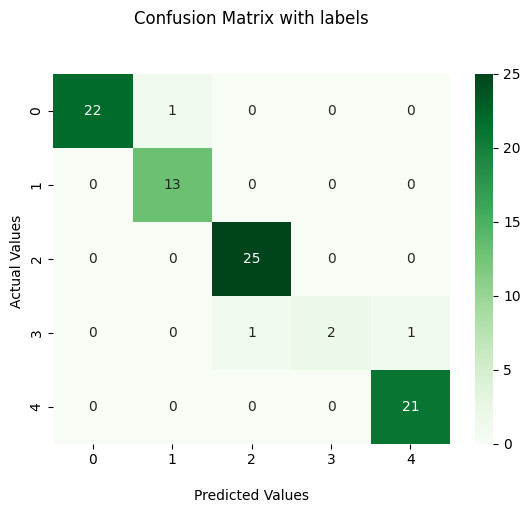

In [38]:
# now, visualize confusion metrix

ax = sns.heatmap(cm, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9854
Test set score: 0.9651


The score's difference between the training and testing set while k=2 is 0.07, let's try with difference value of k to minimize the different scores of these two sets

We see that the model has the highest accuaracies rate with k in range (1,5) , so let's try with each of this value 

In [40]:
for i in range (1,6):
    knn_i= KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    y_pred_i= knn_i.predict(X_test)
    print('Model accuracy score with',i,' : {0:0.4f}'. format(accuracy_score(y_test, y_pred_i)))
    print('Training set score: {:.4f}'.format(knn_i.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(knn_i.score(X_test, y_test))) 
    print('Different scores :{:.4f}.'.format((np.mean(y_pred_i!=y_test))))
    print('\n')

Model accuracy score with 1  : 0.9651
Training set score: 1.0000
Test set score: 0.9651
Different scores :0.0349.


Model accuracy score with 2  : 0.9651
Training set score: 0.9854
Test set score: 0.9651
Different scores :0.0349.


Model accuracy score with 3  : 0.9535
Training set score: 0.9854
Test set score: 0.9535
Different scores :0.0465.


Model accuracy score with 4  : 0.9070
Training set score: 0.9563
Test set score: 0.9070
Different scores :0.0930.


Model accuracy score with 5  : 0.9070
Training set score: 0.9475
Test set score: 0.9070
Different scores :0.0930.




For k=1, we have the highest accuracy rate for both train and test set .


In [41]:

# def KNN_Best_Params(X_train,X_test,y_train,y_test): #Gridsearchcv
import random
weigh_options= ['uniform','distance']
p = [float('inf')]# 
# Created Grid model
param_grid = dict(n_neighbors =[random.randint(1,sqrt_k*3)], weights = weigh_options , p = p)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train,y_train)
print('Best training score :', grid.best_score_, 'with parameters',grid.best_params_)
knn_grid=KNeighborsClassifier(**grid.best_params_)
knn_grid.fit(X_train,y_train)
y_pred_test_grid = knn_grid.predict(X_test)
y_pred_train_grid = knn_grid.predict(X_train)
    
# Confusion Matrix
cm_test_grid = confusion_matrix(y_test, y_pred_test_grid)
cm_train_grid =confusion_matrix(y_train, y_pred_train_grid)
    
# Accuracy Score
acc_test_grid = accuracy_score(y_test, y_pred_test_grid)
acc_train_grid = accuracy_score(y_train, y_pred_train_grid)
    
print("Test Score: {}, Train Score: {}".format(acc_test_grid, acc_train_grid))
print("CM Test: ",cm_test_grid)
print("CM Train: ",cm_train_grid)
    

Best training score : 0.9240336134453783 with parameters {'n_neighbors': 3, 'p': inf, 'weights': 'distance'}
Test Score: 0.9651162790697675, Train Score: 1.0
CM Test:  [[22  1  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0  0 21]]
CM Train:  [[57  0  0  0  0]
 [ 0 92  0  0  0]
 [ 0  0 80  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 86]]


My training model is overfitting so I will try to simplify it by extracting a smaller sample of this dataset with the method PCA

### PCA

In [42]:
scaled_features

array([[ 1.42398653,  1.50935766,  2.05165877,  1.75030618],
       [ 0.03085034, -0.97834874, -0.35842231,  1.07150685],
       [ 0.03085034, -0.97834874, -0.35842231,  1.22235114],
       ...,
       [-0.66571776, -0.08988217, -1.99727745,  0.26341241],
       [ 1.42398653,  1.06512437,  0.31640039, -0.4261615 ],
       [-1.36228586,  1.33166435,  0.70201336,  1.63178566]])

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca= PCA(n_components = 4)
pca.fit(scaled_features)
pca_df= pca.transform(scaled_features)
pca_df

array([[ 2.45997468, -1.74497215,  1.21106232, -1.00781864],
       [-0.85666555, -1.12168607, -0.37929364, -0.31431244],
       [-0.88848806, -1.24406468, -0.32241393, -0.37372206],
       ...,
       [-1.84976091,  0.02089727,  0.59979421,  0.85320399],
       [ 1.53105419, -0.16804729,  0.37330741,  0.96551808],
       [-0.06694895, -0.25838063,  1.93889424, -1.71876302]])

Text(0.5, 1.0, 'PCA')

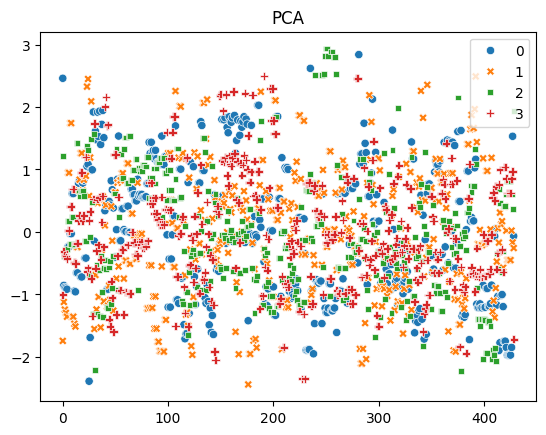

In [45]:
sns.scatterplot(data = pca_df)
plt.title("PCA")

In [46]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, client1_knn['Type_of_transaction'],test_size = 0.3)

In [47]:
from KNN_model import KNN
knn=KNN(k,X_train_pca, X_test_pca, y_train_pca, y_test_pca,knn)

In [48]:
knn.KNN_Best_Params()


Best training score : 0.9433333333333334 with parameters {'n_neighbors': 1, 'p': inf, 'weights': 'uniform'}
Test Score: 0.9224806201550387, Train Score: 1.0
CM Test:  [[25  2  0  0  0]
 [ 2 31  0  0  0]
 [ 0  0 29  2  1]
 [ 0  0  1  3  2]
 [ 0  0  0  0 31]]
CM Train:  [[53  0  0  0  0]
 [ 0 72  0  0  0]
 [ 0  0 73  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 76]]


Since the method PCA doesn't make that much of change, I will use the number that we got from the KNN normal model with the highest training and testing scores (k=2)


In [57]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)
y_pred

array([2, 1, 3, 1, 3, 2, 0, 1, 4, 1, 1, 4, 1, 2, 2, 1, 2, 0, 2, 2, 2, 4,
       1, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 0, 2, 4, 0, 2, 0, 1, 4, 4, 3, 2,
       4, 1, 4, 3, 2, 1, 1, 3, 4, 4, 1, 2, 3, 4, 1, 1, 0, 1, 0, 1, 0, 1,
       3, 3, 4, 2, 1, 2, 2, 1, 1, 2, 1, 0, 4, 1, 2, 2, 1, 0, 0, 1, 1, 2,
       4, 1, 4, 1, 2, 4, 1, 4, 3, 2, 4, 2, 1, 4, 1, 3, 1, 2, 4, 3, 4, 4,
       0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 4, 2, 2, 4, 2, 4, 2, 1, 1, 1, 4,
       4, 4, 4, 3, 1, 4, 4, 0, 4, 4, 0, 4, 1, 0, 1, 4, 2, 1, 4, 0, 1, 4,
       4, 0, 1, 4, 4, 1, 2, 1, 3, 4, 2, 4, 4, 2, 2, 4, 2, 2, 1, 1, 1, 3,
       2, 3, 4, 2, 4, 1, 1, 4, 3, 4, 1, 3, 4, 1, 0, 2, 4, 3, 1, 2, 2, 4,
       0, 2, 2, 1, 1, 3, 0, 4, 1, 1, 0, 0, 0, 4, 2, 0, 2, 0, 4, 3, 2, 1,
       2, 3, 1, 4, 0, 2, 0, 3, 1, 1, 0, 1, 1, 2, 1, 0, 2, 4, 2, 0, 1, 4,
       4, 4, 4, 0, 0, 4, 1, 0, 3, 1, 2, 1, 1, 0, 3, 1, 1, 2, 4, 1, 4, 2,
       1, 4, 2, 0, 1, 0, 4, 0, 1, 1, 4, 1, 2, 0, 2, 0, 0, 0, 1, 4, 4, 1,
       2, 2, 1, 0, 0, 2, 4, 1, 3, 2, 0, 0, 4, 0, 2,